In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-pac

In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import matthews_corrcoef
from sklearn import datasets
import xgboost as xgb
from sklearn.metrics import r2_score 
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
descriptors = pd.read_csv('fgv.csv')
descriptors
X = descriptors.drop(['canonical_smiles','pIC50'], axis=1)
y=descriptors['pIC50']

In [6]:
def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold=(.9 * (1 - .9))) 
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]
 
X = remove_low_variance(X, threshold=0.4)

In [8]:
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)


100%|██████████| 42/42 [05:04<00:00,  7.24s/it]


In [10]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.99,0.99,0.12,0.78
ExtraTreeRegressor,0.99,0.99,0.12,0.53
ExtraTreesRegressor,0.99,0.99,0.12,41.86
GaussianProcessRegressor,0.99,0.99,0.12,24.80
XGBRegressor,0.96,0.97,0.20,2.76
MLPRegressor,0.96,0.97,0.21,6.61
RandomForestRegressor,0.95,0.96,0.22,23.16
BaggingRegressor,0.94,0.95,0.26,3.07
HistGradientBoostingRegressor,0.86,0.89,0.38,11.38


In [11]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [04:29<00:00,  6.42s/it]


In [12]:
models_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,-0.44,0.81,0.52,23.86
XGBRegressor,-0.49,0.81,0.53,2.01
BaggingRegressor,-0.62,0.79,0.55,2.68
SVR,-0.63,0.79,0.56,10.90
NuSVR,-0.63,0.79,0.56,10.63
HistGradientBoostingRegressor,-0.66,0.78,0.56,11.66
LGBMRegressor,-0.66,0.78,0.56,0.52
MLPRegressor,-1.09,0.73,0.63,7.16
ExtraTreesRegressor,-1.33,0.70,0.66,36.62


[(0.0, 1.0)]

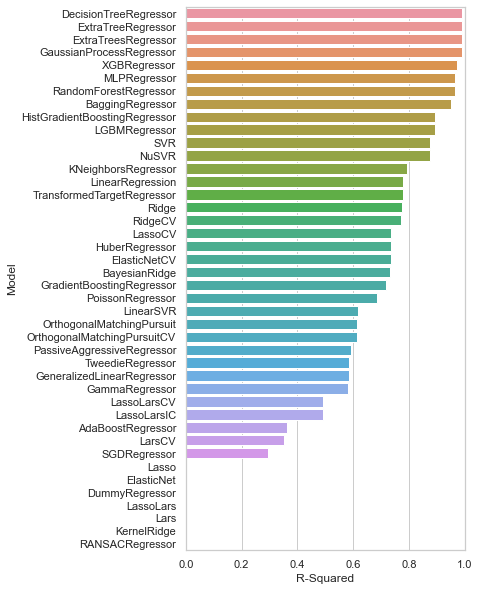

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

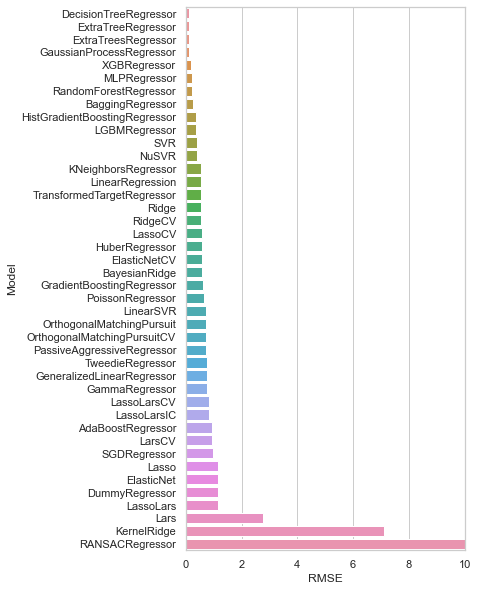

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))